Dataset Loaded Successfully!

🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔹 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

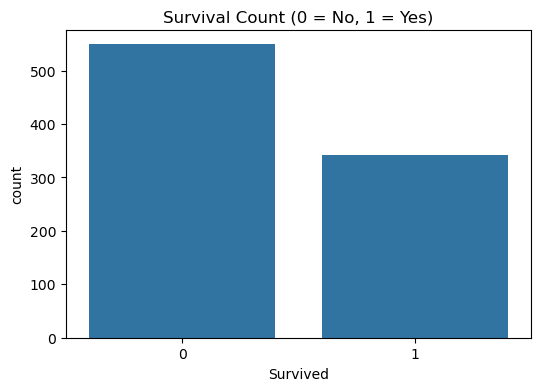

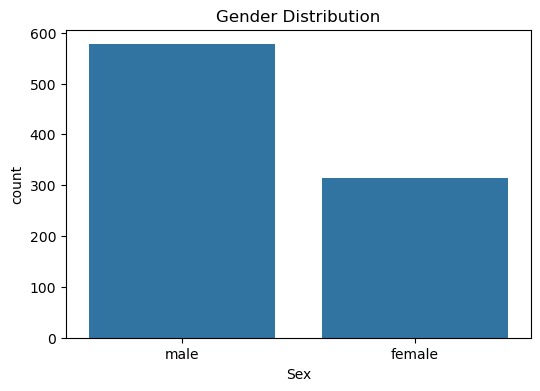

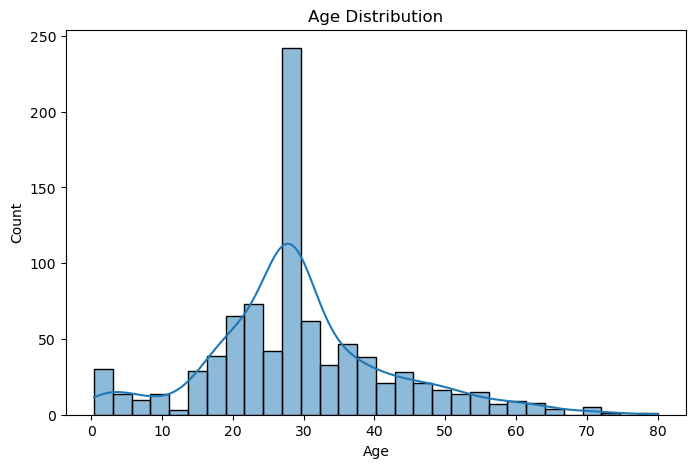

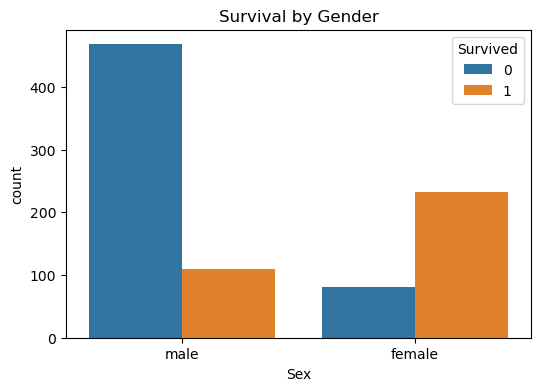

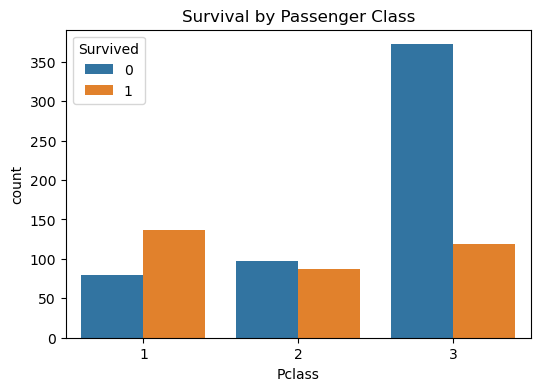

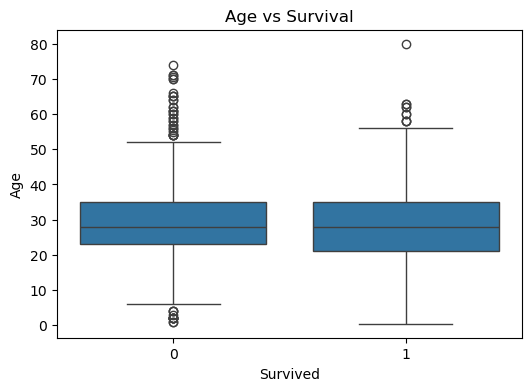

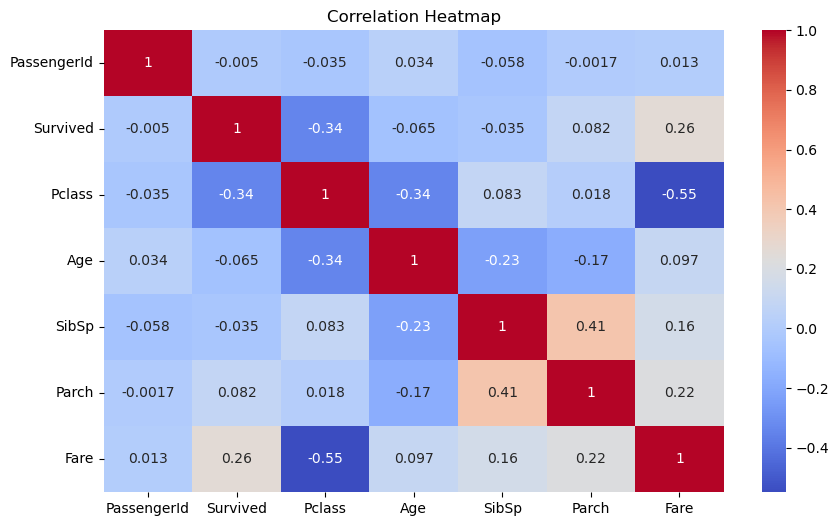


✅ Cleaned dataset saved as 'cleaned_titanic.csv'

🔍 Key Insights:

1. Females had a significantly higher survival rate than males.
2. 1st class passengers survived more than 2nd and 3rd class.
3. Younger passengers had better survival rates overall.
4. Fare and Pclass have a strong correlation with survival.
5. 'Cabin' was removed due to many missing values.



In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("train.csv")
print("Dataset Loaded Successfully!")

# Step 3: View Basic Info
print("\n🔹 Data Info:")
print(df.info())

print("\n🔹 First 5 Rows:")
print(df.head())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Step 4: Clean the Data
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

print("\n✅ After Cleaning Missing Values:")
print(df.isnull().sum())

# Step 5: Univariate Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Step 6: Bivariate Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# Step 7: Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 8: Save Cleaned Data (Optional)
df.to_csv("cleaned_titanic.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_titanic.csv'")

# Step 9: Key Insights
print("\n🔍 Key Insights:")
print("""
1. Females had a significantly higher survival rate than males.
2. 1st class passengers survived more than 2nd and 3rd class.
3. Younger passengers had better survival rates overall.
4. Fare and Pclass have a strong correlation with survival.
5. 'Cabin' was removed due to many missing values.
""")
